<a href="https://colab.research.google.com/github/NoahLee99/ML-DL-studylog/blob/main/Chapter%2009_2%20-%20IMDB%20%EB%A6%AC%EB%B7%B0%20%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **순환 신경망으로 IMDB 리뷰 분류하기**

**키워드**

* 말뭉치: 자연어 처리에서 사용하는 텍스트 데이터의 모음,
<br> 즉 훈련 데이터셋을 일컫는다.

* 토큰: 텍스트에서 공백으로 구분되는 문자열을 말한다.
<br> 종종 소문자로 변환하고 구두점은 삭제한다.

* 원-핫 인코딩: 어떤 클래스에 해당하는 원소만 1이고 나머지는 모두 0인 벡터이다.
<br> 정수로 변환된 토큰을 원-핫 인코딩으로 변환하려면 어휘 사전 크기의 벡터가 만들어진다.

* 단어 임베딩: 정수로 변환된 토큰을 비교적 작은 크기의 실수 밀집 벡터로 변환한다.
<br> 이런 밀집 벡터는 단어 사이의 관계를 표현할 수 있기 때문에 자연어 처리에서 좋은 성능을 발휘한다.

**핵심 패키지 및 함수**

* pad_sequences(): 시퀀스 길이를 맞추기 위해 패딩을 추가한다.
<br> 이 함수는 (샘플 개수, 타임스텝 개수) 크기의 2차원 배열을 기대한다.
<br> maxlen 매개변수로 원하는 시퀀스 길이를 지정할 수 있다.
<br> 이 값보다 긴 시퀀스는 잘리고 짧은 시퀀스는 패딩 된다.
<br> 이 매개변수를 지정하지 않으면 가장 긴 시퀀스의 길이가 된다.
<br> padding 매개변수는 패딩을 추가할 위치를 지정한다.
<br> 기본값인 'pre'는 시퀀스 앞에 패딩을 추가하고 'post'는 시퀀스 뒤에 패딩을 추가한다.
<br> truncating 매개변수는 긴 시퀀스에서 잘라버릴 위치를 지정한다.
<br> 기본값인 'pre'는 시퀀스 앞부분을 잘라내고 'post'는 시퀀스 뒷부분을 잘라낸다.

* to_categorical(): 정수 시퀀스를 원-핫 인코딩으로 변환한다.
<br> 토큰을 원-핫 인코딩하거나 타깃값을 원-핫 인코딩할 때 사용한다.
<br> num_classes 매개변수에서 클래스 개수를 지정할 수 있다.
<br> 지정하지 않으면 데이터에서 자동으로 찾는다.

* SimpleRNN: 케라스의 기본 순환층 클래스이다.
<br> 첫 번째 매개변수에 뉴런의 개수를 지정한다.
<br> activation 매개변수에서 활성화 함수를 지정한다.
<br> 기본값은 하이퍼볼릭 탄젠트인 'tanh'이다.
<br> dropout 매개변수에서 입력에 대한 드롭아웃 비율을 지정 가능하다.
<br> return_sequences 매개변수에서 모든 타임스텝의 은닉 상태를 출력할지 결정한다. 기본 값은 False이다.

* Embedding: 단어 임베딩을 위한 클래스이다.
<br> 첫 번째 매개변수에서 어휘 사전의 크기를 지정한다.
<br> 두 번째 매개변수에서 Embedding 층이 출력할 밀집 벡터의 크기를 지정한다.
<br> input_length 매개변수에서 입력 시퀀스의 길이를 지정한다.
<br> 이 매개변수는 Embedding 층 바로 뒤에 Flatten이나 Dense 클래스가 올 때 꼭 필요하다.

In [ ]:
'''
이전 장에서 순환 신경망의 원리를 살펴보았다.
이번 장에서는 대표적인 순환 신경망 문제인 IMDB 리뷰 데이터셋을 사용해 가장 간단한 순환 신경망 모델을 훈련해 보겠다.

이 데이터셋을 두 가지 방법으로 변형하여 순환 신경망에 주입해 볼 것이다.
하나는 원-핫 인코딩이고 또 다른 하나는 단어 임베딩이다.
이 두 가지 방법의 차이점에 대해 설명하고 순환 신경망을 만들 때 도려해야 할 점을 알아보겠다.

그럼 먼저 이번 장에서 사용할 IMDB 리뷰 데이터셋을 적재하겠다.
'''

'\n이전 장에서 순환 신경망의 원리를 살펴보았다.\n이번 장에서는 대표적인 순환 신경망 문제인 IMDB 리뷰 데이터셋을 사용해 가장 간단한 순환 신경망 모델을 훈련해 보겠다.\n\n이 데이터셋을 두 가지 방법으로 변형하여 순환 신경망에 주입해 볼 것이다.\n하나는 원-핫 인코딩이고 또 다른 하나는 단어 임베딩이다.\n이 두 가지 방법의 차이점에 대해 설명하고 순환 신경망을 만들 때 도려해야 할 점을 알아보겠다.\n\n그럼 먼저 이번 장에서 사용할 IMDB 리뷰 데이터셋을 적재하겠다.\n'

# **IMDB 리뷰 데이터셋**

In [ ]:
'''
IMDB 리뷰 데이터셋은 유명한 인터넷 영화 데이터베이스인 imdb.com에서
수집한 리뷰를 감상평에 따라 긍정과 부정으로 분류해 놓은 데이터셋이다.
총 50,000개의 샘플로 이루어져 있고 훈련 데이터와 테스트 데이터에 각각 25,000개씩 나누어져 있다.

* 자연어 처리와 말뭉치란 무엇인가?
  - "자연어 처리(Natural Language Processing, NLP)"는 컴퓨터를 사용해 인간의 언어를 처리하는 분야이다.
    대표적인 세부 분야로는 음성 인식, 기계 번역, 감성 분석 등이 있다.
    IMDB 리뷰를 감상평에 따라 분류하는 작업은 감성 분석에 해당한다.
    자연어 처리 분야에서는 훈련 데이터를 종종 "말뭉치(corpus)"라고 부른다.
    예를 들어 IMDB 리뷰 데이터셋이 하나의 말뭉치이다.

* 한글 문장은 어떻게 토큰을 분리하는가?
  - 한글은 조사가 발달되어 있기 때문에 공백으로 나누는 것만으로는 부족하다.
    일반적으로 한글은 형태소 분석을 통해 토큰을 만든다.
    안타깝지만 한글의 형태소 분석은 이 책의 범위를 넘어선다.

토큰에 할당되는 정수 중에서 몇 개는 특정한 용도로 예약되어 있는 경우가 많다.
예를 들어 0은 패딩, 1은 문장의 시작, 2는 어휘 사전에 없는 토큰을 나타낸다.

* 어휘 사전은 무엇인가?
  - 훈련 세트에서 고유한 단어를 뽑아 만든 목록을 어휘 사전이라고 말한다.
    예를 들어 테스트 세트 안에 어휘 사전에 없는 단어가 있다면 2로 변환하여 신경망 모델에 주입한다.

실제 IMDB 리뷰 데이터셋은 영어로 된 문장이지만 편리하게도 텐서플로에는 이미 정수로 바꾼 데이터가 포함되어 있따.
tensorflow.keras.datasets 패키지 아래 imdb 모듈을 임포트하여 이 데이터를 적재해 보겠다.
여기에서는 전체 데이터셋에서 가장 자주 등장하는 단어 500개만 사용하겠다.
이렇게 하기 위해 load_data() 함수의 num_words 매개변수를 500으로 지정한다.
'''

'\nIMDB 리뷰 데이터셋은 유명한 인터넷 영화 데이터베이스인 imdb.com에서 \n수집한 리뷰를 감상평에 따라 긍정과 부정으로 분류해 놓은 데이터셋이다.\n총 50,000개의 샘플로 이루어져 있고 훈련 데이터와 테스트 데이터에 각각 25,000개씩 나누어져 있다.\n\n* 자연어 처리와 말뭉치란 무엇인가?\n  - "자연어 처리(Natural Language Processing, NLP)"는 컴퓨터를 사용해 인간의 언어를 처리하는 분야이다.\n    대표적인 세부 분야로는 음성 인식, 기계 번역, 감성 분석 등이 있다.\n    IMDB 리뷰를 감상평에 따라 분류하는 작업은 감성 분석에 해당한다.\n    자연어 처리 분야에서는 훈련 데이터를 종종 "말뭉치(corpus)"라고 부른다.\n    예를 들어 IMDB 리뷰 데이터셋이 하나의 말뭉치이다.\n\n사실 텍스트 자체를 신경망에 전달하지는 않는다.\n컴퓨터에서 처리하는 모든 것은 어떤 숫자 데이터이다. (Digit-all)\n앞서 합성곱 신경망에서 이미지를 다룰 때는 특별한 변환을 하지 않았다.\n이미지가 정수 픽셀값으로 이루어져 있기 때문이다.\n텍스트 데이터의 경우 단어를 숫자 데이터로 바꾸는 일반적인 방법은 데이터에 등장하는 단어마다 고유한 정수를 부여하는 것이다.\n예를 들면 다음과 같다.\n\nHe follows the cat. He loves the cat. --> [10, 11, 12, 13, 10, 14, 12, 13]\n\n두 문장에 등장하는 각 단어를 하나의 정수에 매핑했고, 동일한 단어는 동일한 정수에 매핑된다.\n단어에 매핑되는 정수는 단어의 의미나 크기와 관련이 없다.\n예를 들어 "He"를 10으로 매핑하고 "cat"을 13에 매핑하더라도 "cat"이 "He"보다 좋거나 크다는 뜻은 아니다.\n이 정숫값 사이에는 어떠한 관계도 없다.\n일반적으로 영어 문장은 모두 소문자로 바꾸고 구두점을 삭제한 다음 공백을 기준으로 분리한다.\n이렇게 분리된 단어를 "토큰(token)"이라고 

In [ ]:
!pip install --upgrade tensorflow  # Upgrade TensorFlow to the latest stable version
!pip install --upgrade tensorflow-gpu  # Upgrade TensorFlow GPU version (if using GPU)

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
# IMDB 데이터셋 적재
import tensorflow as tf
tf.keras.utils.set_random_seed(42)

from tensorflow.keras.datasets import imdb

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

In [ ]:
# 훈련 세트와 테스트 세트의 크기 확인
print(train_input.shape, test_input.shape)

# 1차원 배열임을 알 수 있음 (25000,)

(25000,) (25000,)


In [ ]:
'''
앞서 말했듯이 이 데이터셋은 훈련 세트와 테스트 세트가 각각 25,000개의 샘플로 이루어져 있다.
그런데 배열이 1차원인 게 이상해 보이지 않는가?
IMDB 리뷰 텍스트는 길이가 제각각이다.
따라서 고정 크기의 2차원 배열에 담기 보다는
리뷰마다 별도의 파이썬 리스트에 담아야 메모리를 효율적으로 사용 가능하다.
ex) train_input : [리뷰1, 리뷰2, 리뷰3, ...]

즉 위의 예시처럼 이 데이터는 개별 리뷰를 담은 파이썬 리스트 객체로 이루어진 넘파이 배열이다.
그렇다. 넘파이 배열은 정수나 실수 외에도 파이썬 객체를 담을 수도 있다.
그럼 다음과 같이 첫 번째 리뷰의 길이를 출력해 보자.
'''

'\n앞서 말했듯이 이 데이터셋은 훈련 세트와 테스트 세트가 각각 25,000개의 샘플로 이루어져 있다.\n그런데 배열이 1차원인 게 이상해 보이지 않는가?\nIMDB 리뷰 텍스트는 길이가 제각각이다.\n따라서 고정 크기의 2차원 배열에 담기 보다는 \n리뷰마다 별도의 파이썬 리스트에 담아야 메모리를 효율적으로 사용 가능하다.\nex) train_input : [리뷰1, 리뷰2, 리뷰3, ...]\n\n즉 위의 예시처럼 이 데이터는 개별 리뷰를 담은 파이썬 리스트 객체로 이루어진 넘파이 배열이다.\n그렇다. 넘파이 배열은 정수나 실수 외에도 파이썬 객체를 담을 수도 있다.\n그럼 다음과 같이 첫 번째 리뷰의 길이를 출력해 보자.\n'

In [ ]:
# 첫 번째 리뷰 길이 출력
print(len(train_input[0]))

218


In [ ]:
# 두 번째 리뷰 길이 출력
print(len(train_input[1]))

# 리뷰마다 각각 길이가 다름을 알 수 있음

189


In [ ]:
# 첫 번째 리뷰에 담긴 내용 출력
print(train_input[0])

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [ ]:
'''
앞서 설명했듯 텐서플로에 있는 IMDB 리뷰 데이터는 이미 정수로 변환되어 있다.
앞서 num_words=500으로 지정했기 때문에 어휘 사전에는 500개의 단어만 들어 있다.
따라서 어휘 사전에 없는 단어는 모두 2로 표시되어 나타난다.

* 어떤 기준으로 500개의 단어를 고른 것인가?
  - imdb.load_data() 함수는 전체 어휘 사전에 있는 단어를 등장 횟수 순서대로
    나열한 다음 가장 많이 등장한 500개의 단어를 선택한다.
'''

'\n앞서 설명했듯 텐서플로에 있는 IMDB 리뷰 데이터는 이미 정수로 변환되어 있다.\n앞서 num_words=500으로 지정했기 때문에 어휘 사전에는 500개의 단어만 들어 있다.\n따라서 어휘 사전에 없는 단어는 모두 2로 표시되어 나타난다.\n\n* 어떤 기준으로 500개의 단어를 고른 것인가?\n  - imdb.load_data() 함수는 전체 어휘 사전에 있는 단어를 등장 횟수 순서대로\n    나열한 다음 가장 많이 등장한 500개의 단어를 선택한다.\n'

In [ ]:
# 타깃 데이터 출력
print(train_target[:20])

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [ ]:
'''
내가 해결해야 할 문제는 리뷰가 긍정적인지 부정적인지 판단(분류)하는 것이다.
그렇다면 이진 분류 문제로 볼 수 있으므로 타깃값이 0(부정)과 1(긍정)로 나눠진다.

이제 데이터를 더 살펴보기 전에 훈련 세트에서 검증 세트를 떼어 놓도록 하자.
원래 훈련 세트의 크기가 25,000개였으므로 20%를 검증 세트로 떼어 놓으면
훈련 세트의 크기는 20,000개로 줄어들 것이다.
'''

'\n내가 해결해야 할 문제는 리뷰가 긍정적인지 부정적인지 판단(분류)하는 것이다.\n그렇다면 이진 분류 문제로 볼 수 있으므로 타깃값이 0(부정)과 1(긍정)로 나눠진다.\n\n이제 데이터를 더 살펴보기 전에 훈련 세트에서 검증 세트를 떼어 놓도록 하자.\n원래 훈련 세트의 크기가 25,000개였으므로 20%를 검증 세트로 떼어 놓으면\n훈련 세트의 크기는 20,000개로 줄어들 것이다.\n'

In [ ]:
# 훈련 세트에서 검증 세트 분할
from sklearn.model_selection import train_test_split

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

In [ ]:
'''
이제 훈련 세트에 대해 몇 가지 조사를 할 것이다.
먼저 각 리뷰의 길이를 계산해 넘파이 배열에 담겠다.
이렇게 하는 이유는 평균적인 리뷰의 길이와 가장 짧은 리뷰의 길이
그리고 가장 긴 리뷰의 길이를 확인하고 싶기 때문이다.
이를 위해 넘파이 리스트 내포를 사용해 train_input의 원소를 순회하며 길이를 재도록 하겠다.
'''

'\n이제 훈련 세트에 대해 몇 가지 조사를 할 것이다.\n먼저 각 리뷰의 길이를 계산해 넘파이 배열에 담겠다.\n이렇게 하는 이유는 평균적인 리뷰의 길이와 가장 짧은 리뷰의 길이\n그리고 가장 긴 리뷰의 길이를 확인하고 싶기 때문이다.\n이를 위해 넘파이 리스트 내포를 사용해 train_input의 원소를 순회하며 길이를 재도록 하겠다.\n'

In [ ]:
# 길이 측정을 위한 넘파이 리스트 내포 사용
import numpy as np

lengths = np.array([len(x) for x in train_input]) # 표현식에 함수를 사용 가능하며 for문의 요소에 인자 사용 가능

In [ ]:
# 리뷰 길이의 평균 및 중간값 계산
print(np.mean(lengths), np.median(lengths))

# 리뷰 길이는 사용된 토큰의 개수를 의미함

239.00925 178.0


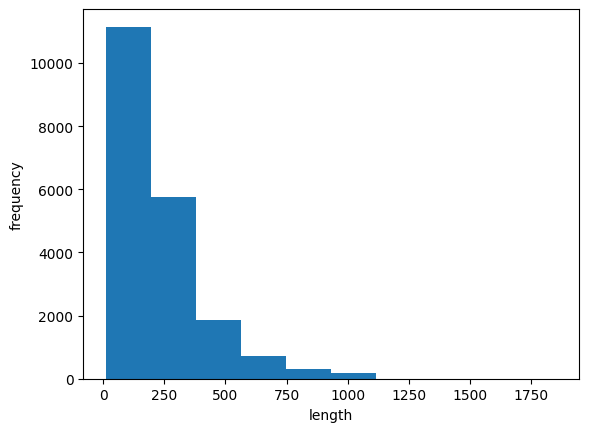

In [ ]:
# lengths 배열 히스토그램으로 시각화
import matplotlib.pyplot as plt

plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()

In [ ]:
'''
시각화 결과, 이 리뷰 데이터는 한쪽으로 치우친 분포를 보이고 있다.
대부분의 리뷰 길이는 300 미만이지만, 아주 긴 리뷰도 일부 존재한다는 것을 의미한다.
어떤 리뷰는 1,000개의 단어가 넘기도 한다!

리뷰는 대부분 짧아서 이 예제에서는 중간갑보다 훨씬 짧은 100개의 단어만 사용하겠다.
하지만 여전히 100개의 단어보다 작은 리뷰가 있다.
이런 리뷰들의 길이는 100에 맞추기 위해 패딩이 필요하다.
보통 패딩을 나타내는 토큰으로는 0을 사용한다.

물론 수동으로 훈련 세트에 있는 20,000개의 리뷰를 순회하면서 길이가 100이 되도록 잘라내거나 0으로 패딩 가능하다.
하지만 케라스는 시퀀스 데이터의 길이를 맞추는 pad_seqeunces() 함수를 제공한다.
이 함수를 사용해 train_input의 길이를 100으로 맞춰 보겠다.
'''

'\n시각화 결과, 이 리뷰 데이터는 한쪽으로 치우친 분포를 보이고 있다.\n대부분의 리뷰 길이는 300 미만이지만, 아주 긴 리뷰도 일부 존재한다는 것을 의미한다.\n어떤 리뷰는 1,000개의 단어가 넘기도 한다!\n\n리뷰는 대부분 짧아서 이 예제에서는 중간갑보다 훨씬 짧은 100개의 단어만 사용하겠다.\n하지만 여전히 100개의 단어보다 작은 리뷰가 있다.\n이런 리뷰들의 길이는 100에 맞추기 위해 패딩이 필요하다.\n보통 패딩을 나타내는 토큰으로는 0을 사용한다.\n\n물론 수동으로 훈련 세트에 있는 20,000개의 리뷰를 순회하면서 길이가 100이 되도록 잘라내거나 0으로 패딩 가능하다.\n하지만 케라스는 시퀀스 데이터의 길이를 맞추는 pad_seqeunces() 함수를 제공한다.\n이 함수를 사용해 train_input의 길이를 100으로 맞춰 보겠다.\n'

In [ ]:
# trian_input의 길이를 100으로 조정
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)

# maxlen에 원하는 길이를 지정하면 이보다 긴 경우는 잘라내고 짤읍 경우는 0으로 패딩함

In [ ]:
# 조정 결과물의 크기 확인
print(train_seq.shape)

# (20000,) --> (20000, 100) 2차원 배열이 되었음 (샘플 개수, 토큰(타임세틉) 개수)

(20000, 100)


In [ ]:
# 첫 번째 샘플 출력
print(train_seq[0])

# 샘플의 앞뒤에 패딩값 0이 없는 것으로 보아 100보다 길었을 것 같음 --> 앞 or 뒤 어느 부분이 잘렸을까?

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [ ]:
# 원본 샘플의 끝 부분 확인(train_input)
print(train_input[0][-10:])

# 리스트 인덱스에 슬라이싱 연산자를 적용하여, 특정 요소의 특정 값들을 확인 가능함

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [ ]:
'''
음수 인덱스와 슬라이싱을 사용해 trian_input[0]에 있는 마지막 10개의 토큰을 출력했다.
train_seq[0]의 출력값과 비교하면 정확히 일치한다.
그렇다면 샘플의 앞부분이 잘렸다는 것을 짐작할 수 있을 것이다.

pad_sequences() 함수는 기본적으로 maxlen보다 긴 시퀀스의 앞부분을 자른다.
이렇게 하는 이유는 일반적으로 시퀀스의 뒷부분의 정보가 더 유용하리라 기대하기 때문이다.
영화 리뷰 데이터를 생각해 보면 리뷰 끝에 뭔가 결정적인 소감을 말할 가능성이 높다고 볼 수 있다.
만약 시퀀스의 뒷부분을 잘라내고 싶다면 pad_sequences() 함수의
truncating(가지를 치다) 매개변수의 값을 기본값 'pre'가 아닌 'post(=back)'로 바꾸면 된다.

이번에는 train_seq에 있는 여섯 번째 샘플을 출력해 보겠다.
'''

"\n음수 인덱스와 슬라이싱을 사용해 trian_input[0]에 있는 마지막 10개의 토큰을 출력했다.\ntrain_seq[0]의 출력값과 비교하면 정확히 일치한다.\n그렇다면 샘플의 앞부분이 잘렸다는 것을 짐작할 수 있을 것이다.\n\npad_sequences() 함수는 기본적으로 maxlen보다 긴 시퀀스의 앞부분을 자른다.\n이렇게 하는 이유는 일반적으로 시퀀스의 뒷부분의 정보가 더 유용하리라 기대하기 때문이다.\n영화 리뷰 데이터를 생각해 보면 리뷰 끝에 뭔가 결정적인 소감을 말할 가능성이 높다고 볼 수 있다.\n만약 시퀀스의 뒷부분을 잘라내고 싶다면 pad_sequences() 함수의 \ntruncating(가지를 치다) 매개변수의 값을 기본값 'pre'가 아닌 'post(=back)'로 바꾸면 된다.\n\n이번에는 train_seq에 있는 여섯 번째 샘플을 출력해 보겠다.\n"

In [ ]:
# 여섯 번째 샘플 출력
print(train_seq[5])

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [ ]:
'''
앞부분에 0이 있는 것으로 보아 이 샘플의 길이는 100이 안 될 것이다.
역시 같은 이유로 패딩 토큰을 시퀀스의 뒷부분이 아니라 앞부분에 추가된다.
시퀀스의 마지막에 있는 단어가 셀의 은닉 상태에 가장 큰 영향을 미치게 되므로
마지막에 패딩을 추가하는 것은 일반적으로 선호하지 않는다.
하지만 원한다면 pad_sequences() 함수의 padding 매개변수 기본값인 'pre'를 'post'로 바꾸면 된다.

그럼 이런 방식대로 검증 세트의 길읻 100으로 맞추어 보자.
'''

"\n앞부분에 0이 있는 것으로 보아 이 샘플의 길이는 100이 안 될 것이다.\n역시 같은 이유로 패딩 토큰을 시퀀스의 뒷부분이 아니라 앞부분에 추가된다.\n시퀀스의 마지막에 있는 단어가 셀의 은닉 상태에 가장 큰 영향을 미치게 되므로\n마지막에 패딩을 추가하는 것은 일반적으로 선호하지 않는다.\n하지만 원한다면 pad_sequences() 함수의 padding 매개변수 기본값인 'pre'를 'post'로 바꾸면 된다.\n\n그럼 이런 방식대로 검증 세트의 길읻 100으로 맞추어 보자.\n"

In [ ]:
# 검증 세트의 길이도 100으로 조정
val_seq = pad_sequences(val_input,maxlen=100)

# **순환 신경망 만들기**

In [ ]:
'''
케라스는 여러 종류의 순환층 클래스를 제공한다.
그중에 가장 간단한 것은 SimpleRNN 클래스이다.
이 클래스는 07-1장에서 설명한 것과 거의 비슷한 기능을 수행한다.
IMDB 리뷰 분류 문제는 이진 분류이므로 마지막 출력층은 1개의 뉴런을 가지고
시그모이드 활성화 함수를 사용해야 한다.
먼저 케라스의 Sequential 클래스로 만든 신경망 코드를 살펴보자.

* Sequential 클래스가 순환 신경망을 만드는 용도인가?
  - 아니다. 이름 때문에 혼동하지 말자.
    이전 장에서 보았듯이 Sequential 클래스는 순환 신경망뿐만 아니라
    합성곱 신경망이나 일반적인 인공 신경망 모델을 모두 만들 수 있다.
    다만 층을 순서대로 쌓기 때문에 Sequential 클래스로 이름을 붙였다.
    순차 데이터(sequential data)와는 관련 없으니 혼동하지 말자.
'''

'\n케라스는 여러 종류의 순환층 클래스를 제공한다.\n그중에 가장 간단한 것은 SimpleRNN 클래스이다.\n이 클래스는 07-1장에서 설명한 것과 거의 비슷한 기능을 수행한다.\nIMDB 리뷰 분류 문제는 이진 분류이므로 마지막 출력층은 1개의 뉴런을 가지고\n시그모이드 활성화 함수를 사용해야 한다.\n먼저 케라스의 Sequential 클래스로 만든 신경망 코드를 살펴보자.\n\n* Sequential 클래스가 순환 신경망을 만드는 용도인가?\n  - 아니다. 이름 때문에 혼동하지 말자.\n    이전 장에서 보았듯이 Sequential 클래스는 순환 신경망뿐만 아니라\n    합성곱 신경망이나 일반적인 인공 신경망 모델을 모두 만들 수 있다.\n    다만 층을 순서대로 쌓기 때문에 Sequential 클래스로 이름을 붙였다.\n    순차 데이터(sequential data)와는 관련 없으니 혼동하지 말자.\n'

In [ ]:
# 순환 신경망 모델 생성
from tensorflow import keras

model = keras.Sequential()

model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500))) # 뉴런의 개수 = 8
model.add(keras.layers.Dense(1, activation='sigmoid'))

# input_shape=(1,, 500) = 이전에 샘플의 길이를 100으로 지정함

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# 원-핫 인코딩 배열 생성
train_oh = keras.utils.to_categorical(train_seq)

In [ ]:
# 배열의 크기 출력
print(train_oh.shape)

(20000, 100, 500)


In [ ]:
'''
정수 하나마다 모두 500차원의 배열로 변경되었기 때무에 (20000, 100) 크기의 train_seq가
(20000, 100, 500) 크기의 train_oh로 바뀌었다.
이렇게 샘플 데이터의 크기가 1차원 정수 배열 (100, )에서 2차원 배열(100, 500)로 바꿔야 하므로
SimpleRNN 클래스의 input_shape 매개변수의 값을 (100, 500)으로 지정한 것이다.
(샘플 개수, 문장 최대 길이, 어휘 사전의 단어 개수)

train_oh의 첫 번째 샘플의 첫 번째 토큰 10이 잘 인코딩되었는지 출력해 보자.
'''

'\n정수 하나마다 모두 500차원의 배열로 변경되었기 때무에 (20000, 100) 크기의 train_seq가\n(20000, 100, 500) 크기의 train_oh로 바뀌었다.\n이렇게 샘플 데이터의 크기가 1차원 정수 배열 (100, )에서 2차원 배열(100, 500)로 바꿔야 하므로\nSimpleRNN 클래스의 input_shape 매개변수의 값을 (100, 500)으로 지정한 것이다.\n(샘플 개수, 문장 최대 길이, 어휘 사전의 단어 개수)\n\ntrain_oh의 첫 번째 샘플의 첫 번째 토큰 10이 잘 인코딩되었는지 출력해 보자.\n'

In [ ]:
# 첫 번째 샘플의 첫 번째 토큰 10 출력
print(train_oh[0][0][:12])

# train_oh[0] = 첫 번째 샘플 선택
# train_oh[0][0] = 첫 번째 샘플의 첫 번째 토큰 선택
# train_oh[0][0][:12] = 원-핫 인코딩 백터의 처음 12개 요소들 선택"

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [ ]:
# 모든 원소의 값이 1이 되는지 확인
print(np.sum(train_oh[0][0]))

# 원-핫 인코딩이 잘 적용되었나 확인하는 것임

1.0


In [ ]:
'''
토큰 10이 잘 인코딩 되었다.
열한 번째 원소만 1이고 나머지는 모두 0이어서 원-핫 인코딩된 배열의 값을 모두 더한 결과가 1이 되었다.
같은 방식으로 val_seq도 원-핫 인코딩으로 바꾸어 놓겠다.
'''

'\n토큰 10이 잘 인코딩 되었다.\n열한 번째 원소만 1이고 나머지는 모두 0이어서 원-핫 인코딩된 배열의 값을 모두 더한 결과가 1이 되었다.\n같은 방식으로 val_seq도 원-핫 인코딩으로 바꾸어 놓겠다.\n'

In [ ]:
val_oh = keras.utils.to_categorical(val_seq)

In [ ]:
# 생선한 모델의 구조 출력
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 8)                   │           4,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,081 (15.94 KB)

 Trainable params: 4,081 (15.94 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
'''
SimpleRNN에 전달할 샘플의 크기는 (100, 500)이지만 이 순환층은 마지막 타임스텝의 은닉 상태만 출력한다.
이 때문에 출력 크기가 순환층의 뉴런 개수와 동일한 8임을 확인할 수 있다.

순환층에 사용된 모델 파라미터의 개수를 계산해 보자.
입력 토큰은 500차원의 원-핫 인코딩 배열이다.
이 배열이 순환층의 뉴런 8개와 완전히 연결되기 때문에 총 500 * 8 = 4,000개의 가중치가 있다.
순환층의 은닉 상태는 다시 다음 타임스텝에 사용되기 위해 또 다른 가중치와 곱해진다.
이 은닉 상태도 순환층의 뉴런과 완전히 연결되기 때문에 8(은닉 상태 크기) * 8(뉴런 개수) = 64개의 가중치가 필요하다.
마지막으로 뉴런마다 하나의 절편이 있다.
따라서 모두 4,000 + 64 + 8 = 4,072개의 모델 파라미터가 필요하다.

케라스 API를 사용해 순환 신경망 모델을 손쉽게 만들었다.
이전에 만들었던 완전 연결 신경망에 비해 크게 바뀐 것은 없다.
Dense 층 대신에 SimpleRNN 층을 사용했고 입력 데이터의 차원을 원-핫 인코딩으로 바꿔 주었다.
다음 섹션에서 이 순환 신경망 모델을 훈련해 보겠다.
'''

'\nSimpleRNN에 전달할 샘플의 크기는 (100, 500)이지만 이 순환층은 마지막 타임스텝의 은닉 상태만 출력한다.\n이 때문에 출력 크기가 순환층의 뉴런 개수와 동일한 8임을 확인할 수 있다.\n\n순환층에 사용된 모델 파라미터의 개수를 계산해 보자.\n입력 토큰은 500차원의 원-핫 인코딩 배열이다.\n이 배열이 순환층의 뉴런 8개와 완전히 연결되기 때문에 총 500 * 8 = 4,000개의 가중치가 있다.\n순환층의 은닉 상태는 다시 다음 타임스텝에 사용되기 위해 또 다른 가중치와 곱해진다.\n이 은닉 상태도 순환층의 뉴런과 완전히 연결되기 때문에 8(은닉 상태 크기) * 8(뉴런 개수) = 64개의 가중치가 필요하다.\n마지막으로 뉴런마다 하나의 절편이 있다.\n따라서 모두 4,000 + 64 + 8 = 4,072개의 모델 파라미터가 필요하다.\n\n케라스 API를 사용해 순환 신경망 모델을 손쉽게 만들었다.\n이전에 만들었던 완전 연결 신경망에 비해 크게 바뀐 것은 없다.\nDense 층 대신에 SimpleRNN 층을 사용했고 입력 데이터의 차원을 원-핫 인코딩으로 바꿔 주었다.\n다음 섹션에서 이 순환 신경망 모델을 훈련해 보겠다.\n'

# **순환 신경망 훈련하기**

In [ ]:
'''
순환 신경망의 훈련은 완전 연결 신경망이나 합성곱 신경망과 크게 다르지 않다.
모데을 만드는 것은 달라도 훈련하는 방법은 모두 같다.
이것이 케라스 API를 사용하는 장점이다.
다음 코드처럼 모델을 컴파일하고 훈련하는 전체 구조가 동일하다.

이 예에서는 기본 RMSprop 학습률 0.001을 사용하지 않기 위해
별도의 RMSprop 객체를 만들어 학습률을 0.0001로 지정하였다.
그다음 에포크 횟수를 100으로 늘리고 배치 크기는 64개로 설정했다.
그 밖에 체크포인트와 조기 종료를 구성하는 코드는 거의 동일하다.
'''

'\n순환 신경망의 훈련은 완전 연결 신경망이나 합성곱 신경망과 크게 다르지 않다.\n모데을 만드는 것은 달라도 훈련하는 방법은 모두 같다.\n이것이 케라스 API를 사용하는 장점이다.\n다음 코드처럼 모델을 컴파일하고 훈련하는 전체 구조가 동일하다.\n\n이 예에서는 기본 RMSprop 학습률 0.001을 사용하지 않기 위해 \n별도의 RMSprop 객체를 만들어 학습률을 0.0001로 지정하였다.\n그다음 에포크 횟수를 100으로 늘리고 배치 크기는 64개로 설정했다.\n그 밖에 체크포인트와 조기 종료를 구성하는 코드는 거의 동일하다.\n'

In [ ]:
# 순환 신경망 모델 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_oh, train_target, epochs=100, batch_size=64,
                    validation_data=(val_oh, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.4938 - loss: 0.7051 - val_accuracy: 0.5002 - val_loss: 0.7008
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.5025 - loss: 0.6988 - val_accuracy: 0.5012 - val_loss: 0.6976
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.5135 - loss: 0.6950 - val_accuracy: 0.5068 - val_loss: 0.6950
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.5237 - loss: 0.6921 - val_accuracy: 0.5158 - val_loss: 0.6929
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.5343 - loss: 0.6896 - val_accuracy: 0.5278 - val_loss: 0.6910
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.5440 - loss: 0.6873 - val_accuracy: 0.5400 - val_loss: 0.6895
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.5574 - loss: 0.6852 - val_accuracy: 0.5408 - val_loss: 0.6881
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.5662 - loss: 0.6830 -

In [ ]:
'''
이 훈련은 61 번째 에포크에서 조기 종료되었다.
검증 세트에 대한 정확도는 약 79% 정도이다.
매우 뛰어난 성능은 아니지만 감상평을 분류하는 데 어느 정도 성과를 내고 있다고 판단할 수 있다.

그럼 이전 장에서처럼 훈련 손실과 검증 손실을 그래프로 그려 훈련 과정을 살펴 보자.
'''

'\n이 훈련은 61 번째 에포크에서 조기 종료되었다.\n검증 세트에 대한 정확도는 약 79% 정도이다.\n매우 뛰어난 성능은 아니지만 감상평을 분류하는 데 어느 정도 성과를 내고 있다고 판단할 수 있다.\n\n그럼 이전 장에서처럼 훈련 손실과 검증 손실을 그래프로 그려 훈련 과정을 살펴 보자.\n'

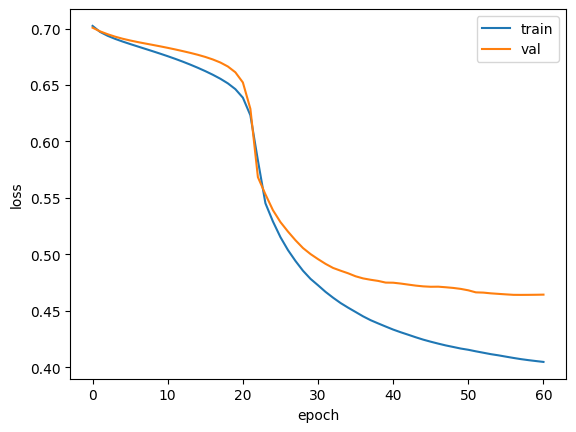

In [ ]:
# 훈련 손실과 검증 손실 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
'''
SimpleRNN에 전달할 샘플의 크기는 (100, 500)이지만 이 순환층은 마지막 타임스텝의 은닉 상태만 출력한다.
이 때문에 출력 크기가 순환층의 뉴런 개수와 동일한 8임을 확인할 수 있다.

순환층에 사용된 모델 파라미터의 개수를 계산해 보자.
입력 토큰은 500차원의 원-핫 인코딩 배열이다.
이 배열이 순환층의 뉴런 8개와 완전히 연결되기 때문에 총 500 * 8 = 4,000개의 가중치가 있다.
순환층의 은닉 상태는 다시 다음 타임스텝에 사용되기 위해 또 다른 가중치와 곱해진다.
이 은닉 상태도 순환층의 뉴런과 완전히 연결되기 때문에 8(은닉 상태 크기) * 8(뉴런 개수) = 64개의 가중치가 필요하다.
마지막으로 뉴런마다 하나의 절편이 있다.
따라서 모두 4,000 + 64 + 8 = 4,072개의 모델 파라미터가 필요하다.

케라스 API를 사용해 순환 신경망 모델을 손쉽게 만들었다.
이전에 만들었던 완전 연결 신경망에 비해 크게 바뀐 것은 없다.
Dense 층 대신에 SimpleRNN 층을 사용했고 입력 데이터의 차원을 원-핫 인코딩으로 바꾸어 주었다.
다음 섹션에서 이 순환 신경망 모델을 훈련해 보겠다.
'''

In [ ]:
'''
훈련 손실은 꾸준히 감소하고 있지만 검증 손실은 대략 40 번째 에포크에서 감소가 둔해지고 있다.
적절한 에포크에서 훈련을 멈춘 것 같다. 성공적이다.
08-1장에서 배운 순환 신경망을 성공적으로 훈련시켜서 IMDB 리뷰 데이터를 긍정과 부정으로 분류하는 작업을 수행했다.

여기서 한 가지 생각할 점이 있다.
이 작업을 하기 위해서 입력 데이터를 원-핫 인코딩으로 변환했다.
원-핫 인코딩의 단점은 입력 데이터가 엄청 커진다는 것이다.
실제로 train_seq 배열과 train_oh 배열의 nbytes 속성을 출력하여 크기를 확인해 보자.
'''

'\n훈련 손실은 꾸준히 감소하고 있지만 검증 손실은 대략 40 번째 에포크에서 감소가 둔해지고 있다.\n적절한 에포크에서 훈련을 멈춘 것 같다. 성공적이다.\n08-1장에서 배운 순환 신경망을 성공적으로 훈련시켜서 IMDB 리뷰 데이터를 긍정과 부정으로 분류하는 작업을 수행했다.\n\n여기서 한 가지 생각할 점이 있다.\n이 작업을 하기 위해서 입력 데이터를 원-핫 인코딩으로 변환했다.\n원-핫 인코딩의 단점은 입력 데이터가 엄청 커진다는 것이다.\n실제로 train_seq 배열과 train_oh 배열의 nbytes 속성을 출력하여 크기를 확인해 보자.\n'

In [ ]:
# nbytes 속성 출력을 통한 크기 확인
print(train_seq.nbytes, train_oh.nbytes)

8000000 8000000000


In [ ]:
'''
토큰 1개를 500차원으로 늘렸기 때문에 대략 500배가 커진다.
이는 썩 좋은 방법은 아닌 것 같다.
훈련 데이터가 커질수록 더 문제가 될 것이다.
다음 섹션에서 순환 신경망에 사용하는 더 좋은 단어 표현 방법을 알아보자.
'''

# **단어 임베딩 사용하기**

In [ ]:
'''
순환 신경망에서 텍스트를 처리할 때 즐겨 사용하는 방법은 "단어 임베딩(word embedding)"이다.
단어 임베딩은 각 단어를 고정된 크기의 실수 벡터로 바꿔 준다.
예를 들면 다음과 같다.
"cat"의 단어 임베딩 벡터 = [0.2 0.1 1.3 0.8 0.2 0.4 1.1 0.9 0.2 0.1]

이런 단어 임베딩으로 만들어진 벡터는 원-핫 인코딩된 벡터보다 훨씬 의미 있는 값으로 채워져 있기에
자연어 처리에서 더 좋은 성능을 내는 경우가 많다.
물론 이런 단어 임베딩 벡터를 만드는 층은 이미 준비되어 있다.
케라스에서는 keras.layers 패키지 아래 Embedding 클래스로 임베딩 기능을 제공한다.
이 클래스를 다른 층처럼 모델에 추가하면 처음에는 모든 벡터가 랜덤하게 초기화되지만
훈련을 통해 데이터에서 좋은 단어 임베딩을 학습한다.

단어 임베딩의 장점은 입력으로 정수 데이터를 받는다는 것이다.
즉 원-핫 인코딩으로 변경된 train_oh 배열이 아니라 train_seq를 사용할 수 있다.
이 때문에 메모리를 훨씬 효율적으로 사용할 수 있다.

앞서 원-핫 인코딩은 샘플 하나를 500차원으로 늘렸기 때문에
(100, ) 크기의 샘플을 (100, 20)과 같이 2차원 배열로 늘린다.
이와 비슷하게 임베딩도 (100, ) 크기의 샘플을 (100, 20)과 같이 2차원 배열로 늘린다.
하지만 원-핫 인코딩과는 달리 훨씬 작은 크기로도 단어를 잘 표현할 수 있다.

Embedding 클래스를 SimpleRNN 층 앞에 추가한 두 번째 순환 신경망을 만들어 보겠다.
'''

'\n순환 신경망에서 텍스트를 처리할 때 즐겨 사용하는 방법은 "단어 임베딩(word embedding)"이다.\n단어 임베딩은 각 단어를 고정된 크기의 실수 벡터로 바꿔 준다.\n예를 들면 다음과 같다.\n"cat"의 단어 임베딩 벡터 = [0.2 0.1 1.3 0.8 0.2 0.4 1.1 0.9 0.2 0.1]\n\n이런 단어 임베딩으로 만들어진 벡터는 원-핫 인코딩된 벡터보다 훨씬 의미 있는 값으로 채워져 있기에\n자연어 처리에서 더 좋은 성능을 내는 경우가 많다.\n물론 이런 단어 임베딩 벡터를 만드는 층은 이미 준비되어 있다.\n케라스에서는 keras.layers 패키지 아래 Embedding 클래스로 임베딩 기능을 제공한다.\n이 클래스를 다른 층처럼 모델에 추가하면 처음에는 모든 벡터가 랜덤하게 초기화되지만\n훈련을 통해 데이터에서 좋은 단어 임베딩을 학습한다.\n\n단어 임베딩의 장점은 입력으로 정수 데이터를 받는다는 것이다.\n즉 원-핫 인코딩으로 변경된 train_oh 배열이 아니라 train_seq를 사용할 수 있다.\n이 때문에 메모리를 훨씬 효율적으로 사용할 수 있다.\n\n앞서 원-핫 인코딩은 샘플 하나를 500차원으로 늘렸기 때문에 \n(100, ) 크기의 샘플을 (100, 20)과 같이 2차원 배열로 늘린다.\n이와 비슷하게 임베딩도 (100, ) 크기의 샘플을 (100, 20)과 같이 2차원 배열로 늘린다.\n하지만 원-핫 인코딩과는 달리 훨씬 작은 크기로도 단어를 잘 표현할 수 있다.\n\nEmbedding 클래스를 SimpleRNN 층 앞에 추가한 두 번째 순환 신경망을 만들어 보겠다.\n'

In [ ]:
# 단어 임베딩을 사용한 순환 신경망 생성
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_shape=(100,)))
model2.add(keras.layers.SimpleRNN(8))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
'''
Embedding 클래스의 첫 번째 매개변수(500)는 어휘 사전의 크기이다.
앞서 IMDB 리뷰 데이터셋에서 500개의 단어만 사용하도록
imdb.load_data(num_words=500)과 같이 설정했기에 이 매개변수의 값을 500으로 지정한다.

두 번째 매개변수(16)는 임베딩 벡터의 크기이다.
여기에서는 원-핫 인코딩보다 훨씬 작은 크기(!6)의 벡터를 사용했다.

세 번째 input_length 매개변수는 입력 시퀀스의 길이이다.
앞서 샘플의 길이를 100으로 맞추어 train_seq를 만들었다.
따라서 이 값을 100으로 설정한다.

그다음 SimpleRNN 층과 Dense 층은 이전과 동일하다.
이 모델의 구조를 출력해 보자.
'''

'\nEmbedding 클래스의 첫 번째 매개변수(500)는 어휘 사전의 크기이다.\n앞서 IMDB 리뷰 데이터셋에서 500개의 단어만 사용하도록 \nimdb.load_data(num_words=500)과 같이 설정했기에 이 매개변수의 값을 500으로 지정한다.\n\n두 번째 매개변수(16)는 임베딩 벡터의 크기이다.\n여기에서는 원-핫 인코딩보다 훨씬 작은 크기(!6)의 벡터를 사용했다.\n\n세 번째 input_length 매개변수는 입력 시퀀스의 길이이다.\n앞서 샘플의 길이를 100으로 맞추어 train_seq를 만들었다.\n따라서 이 값을 100으로 설정한다.\n\n그다음 SimpleRNN 층과 Dense 층은 이전과 동일하다.\n이 모델의 구조를 출력해 보자.\n'

In [ ]:
# 생선한 모델2 구조  출력
model2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 100, 16)             │           8,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_4 (SimpleRNN)             │ (None, 8)                   │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,209 (32.07 KB)

 Trainable params: 8,209 (32.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
'''
summary() 메서드의 출력에서 알 수 잇듯이 이 모델은 (100, ) 크기의 입력을 받아 (100, 16) 크기의 출력을 만든다.
이 모델에서 사용되는 모델 파라미터 개수를 계산해 보자.

Embedding 클래스는 500개의 각 토큰을 크기가 16인 벡터로 변경하기 때문에
총 500 * 16 = 8,000개의 모델 파라미터를 가진다.
그다음 SimpleRNN 층은 임베딩 벡터의 크기가 16이므로 8개의 뉴런과 곱하기 위해 필요한 가중치 16 * 8 = 128개를 가진다.
또한 은닉 상태에 곱해지는 가중치 8 * 8 = 64개가 있다.
마지막으로 8개의 절편이 있으므로 이 순환층에 있는
전체 모델 파라미터의 개수는 128 + 64 + 8 = 200개이다.

마지막 Dense 층의 가중치 개수는 이전과 동일하게 9개이다.
원-핫 인코딩보다 SimpleRNN에 주입되는 입력의 크기가 크게 줄었지만
임베딩 벡터를 잘 표현하는 능력이 있기 때문에 훈련 결과는 이전과 못지않을 것이다.
모델 훈련 과정은 이전과 동일하다.
'''

'\nsummary() 메서드의 출력에서 알 수 잇듯이 이 모델은 (100, ) 크기의 입력을 받아 (100, 16) 크기의 출력을 만든다.\n이 모델에서 사용되는 모델 파라미터 개수를 계산해 보자.\n\nEmbedding 클래스는 500개의 각 토큰을 크기가 16인 벡터로 변경하기 때문에 \n총 500 * 16 = 8,000개의 모델 파라미터를 가진다.\n그다음 SimpleRNN 층은 임베딩 벡터의 크기가 16이므로 8개의 뉴런과 곱하기 위해 필요한 가중치 16 * 8 = 128개를 가진다.\n또한 은닉 상태에 곱해지는 가중치 8 * 8 = 64개가 있다.\n마지막으로 8개의 절편이 있으므로 이 순환층에 있는 \n전체 모델 파라미터의 개수는 128 + 64 + 8 = 200개이다.\n\n마지막 Dense 층의 가중치 개수는 이전과 동일하게 9개이다.\n원-핫 인코딩보다 SimpleRNN에 주입되는 입력의 크기가 크게 줄었지만\n임베딩 벡터를 잘 표현하는 능력이 있기 때문에 훈련 결과는 이전과 못지않을 것이다.\n모델 훈련 과정은 이전과 동일하다.\n'

In [ ]:
# 모델2 훈련
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.keras',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.5109 - loss: 0.6939 - val_accuracy: 0.5596 - val_loss: 0.6870
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.5913 - loss: 0.6825 - val_accuracy: 0.6532 - val_loss: 0.6719
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.6775 - loss: 0.6654 - val_accuracy: 0.7020 - val_loss: 0.6524
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.7115 - loss: 0.6447 - val_accuracy: 0.7248 - val_loss: 0.6314
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.7299 - loss: 0.6213 - val_accuracy: 0.7334 - val_loss: 0.6089
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.7450 - loss: 0.5960 - val_accuracy: 0.7444 - val_loss: 0.5831
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.7569 - loss: 0.5694 - val_accuracy: 0.7532 - val_loss: 0.5586
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.7705 - loss: 0.5410 - 

In [ ]:
'''
출력 결과를 보면 원-핫 인코딩을 사용한 모델과 비슷한 성능을 냈다.
반면에 순환층의 가중치 개수는 훨씬 작고 훈련 세트 크기도 훨씬 줄었다.
마지막으로 훈련 손실과 검증 손실을 그래프로 출력해 보자.
'''

'\n출력 결과를 보면 원-핫 인코딩을 사용한 모델과 비슷한 성능을 냈다.\n반면에 순환층의 가중치 개수는 훨씬 작고 훈련 세트 크기도 훨씬 줄었다.\n마지막으로 훈련 손실과 검증 손실을 그래프로 출력해 보자.\n'

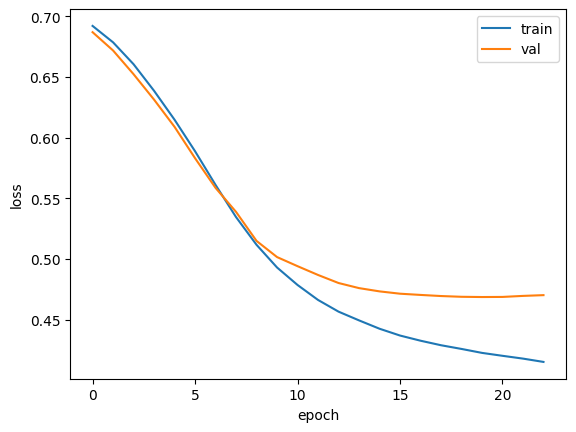

In [ ]:
# 훈련 손실과 검증 손실 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
'''
검증 손실이 더 이상 감소되지 않아 훈련이 적절히 조기 종료 되었다.
이에 비해 훈련 손실은 계속 감소한다.
이를 개선할 방법이 있는지 다음 장에서 알아보겠다.
'''

'\n검증 손실이 더 이상 감소되지 않아 훈련이 적절히 조기 종료 되었다.\n이에 비해 훈련 손실은 계속 감소한다.\n이를 개선할 방법이 있는지 다음 장에서 알아보겠다.\n'